읽어오기

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [171]:
input_file = "maryland_1year_nan_contained.csv"

In [172]:
df = pd.read_csv(input_file)

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,7,10,14,26,27,32,33,41,42,45,50,51,52,53,55,66,69,70,71,74,76,79,81,84,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


nan이 많은 컬럼 삭제

In [173]:
many_nan_list = df.columns[df.isnull().sum(axis=0) >= (200118*2/10)]

In [174]:
len(many_nan_list)

52

In [175]:
slimmed_df = df.drop(many_nan_list, axis=1)

필요없는 컬럼 삭제

In [176]:
slimmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200118 entries, 0 to 200117
Data columns (total 37 columns):
Unnamed: 0                200118 non-null int64
ALCOHOL_TEST_CODE         164293 non-null float64
CDL_FLAG                  160309 non-null object
CONDITION_CODE            163820 non-null float64
DRUG_TEST_CODE            164293 non-null float64
EQUIP_PROB_CODE           196134 non-null float64
FAULT_FLAG                162548 non-null object
INJ_SEVER_CODE            200118 non-null int64
PERSON_ID                 200118 non-null object
PERSON_TYPE               200118 non-null object
REPORT_NO                 200118 non-null object
SAF_EQUIP_CODE            200118 non-null float64
SEX_CODE                  200117 non-null object
VEHICLE_ID                196134 non-null object
COLLISION_TYPE_CODE       200118 non-null int64
C_M_ZONE_FLAG             200118 non-null object
FIX_OBJ_CODE              200118 non-null float64
HARM_EVENT_CODE1          200118 non-null float64
HAR

In [177]:
useless_list = ['Unnamed: 0', 'ALCOHOL_TEST_CODE', 'CDL_FLAG', 'DRUG_TEST_CODE','EQUIP_PROB_CODE','FIX_OBJ_CODE','HARM_EVENT_CODE1',
                'HARM_EVENT_CODE2', 'COMMERCIAL_FLAG', 'AREA_DAMAGED_CODE_MAIN','DAMAGE_CODE', 'HIT_AND_RUN_FLAG',
                'VEH_MAKE']
slimmed_df2 = slimmed_df.drop(useless_list, axis=1)

In [178]:
len(list(slimmed_df2.columns))

24

In [179]:
len(slimmed_df2)

200118

In [180]:
slimmed_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200118 entries, 0 to 200117
Data columns (total 24 columns):
CONDITION_CODE         163820 non-null float64
FAULT_FLAG             162548 non-null object
INJ_SEVER_CODE         200118 non-null int64
PERSON_ID              200118 non-null object
PERSON_TYPE            200118 non-null object
REPORT_NO              200118 non-null object
SAF_EQUIP_CODE         200118 non-null float64
SEX_CODE               200117 non-null object
VEHICLE_ID             196134 non-null object
COLLISION_TYPE_CODE    200118 non-null int64
C_M_ZONE_FLAG          200118 non-null object
JUNCTION_CODE          186610 non-null float64
LANE_CODE              161539 non-null float64
LIGHT_CODE             200118 non-null float64
RD_COND_CODE           186610 non-null float64
RD_DIV_CODE            186610 non-null float64
SIGNAL_FLAG            200118 non-null object
SURF_COND_CODE         186610 non-null float64
WEATHER_CODE           200118 non-null float64
BODY_TYP

INJ_SEVER_CODE 가중치 부여 [1/2]

In [181]:
# key columns 저장
key_list = ['PERSON_ID','PERSON_TYPE','REPORT_NO','VEHICLE_ID','FAULT_FLAG','INJ_SEVER_CODE']
key_df = slimmed_df2[key_list]

In [182]:
# 인명피해점수 구하기

inj_point_df00 = key_df[['REPORT_NO', 'INJ_SEVER_CODE']]

# 인명피해점수 가중치 부여

def inj_weight(i):
    if i['INJ_SEVER_CODE'] == 1:
        j = 0
    elif i['INJ_SEVER_CODE'] == 2:
        j = 1
    elif i['INJ_SEVER_CODE'] == 3:
        j = 2
    elif i['INJ_SEVER_CODE'] == 4:
        j = 5
    elif i['INJ_SEVER_CODE'] == 5:
        j = 89
    return j


inj_point_df00['INJ_WEIGHT'] = inj_point_df00.apply(inj_weight, axis=1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [183]:
# 인명피해 관련 통계 구하기

inj_sum = inj_point_df00.groupby('REPORT_NO').sum()
inj_sum.columns = ['INJ_SUM','INJ_WEIGHT_SUM']

inj_point_df = inj_sum.copy()


In [184]:
# 전체 count

inj_total_count = (inj_point_df00[['REPORT_NO','INJ_SEVER_CODE']].groupby('REPORT_NO').count())
inj_total_count.columns = ['INJ_TOTAL_COUNT']


In [185]:
# 전체 mean

inj_total_mean = (inj_point_df00[['REPORT_NO','INJ_WEIGHT']].groupby('REPORT_NO').mean())
inj_total_mean.columns = ['INJ_TW_MEAN']
#inj_total_mean

In [186]:
inj_point_df['INJ_TOTAL_COUNT'] = inj_total_count['INJ_TOTAL_COUNT']
inj_point_df['INJ_TW_MEAN'] = inj_total_mean['INJ_TW_MEAN']
#inj_point_df

nan 있는 레코드 삭제

In [187]:
no_nan_df = slimmed_df2.dropna()

In [188]:
sorted(list(no_nan_df.columns))

['AGE',
 'BODY_TYPE_CODE',
 'COLLISION_TYPE_CODE',
 'CONDITION_CODE',
 'C_M_ZONE_FLAG',
 'FAULT_FLAG',
 'HARM_EVENT_CODE',
 'INJ_SEVER_CODE',
 'JUNCTION_CODE',
 'LANE_CODE',
 'LIGHT_CODE',
 'MOVEMENT_CODE',
 'PERSON_ID',
 'PERSON_TYPE',
 'RD_COND_CODE',
 'RD_DIV_CODE',
 'REPORT_NO',
 'SAF_EQUIP_CODE',
 'SEX_CODE',
 'SIGNAL_FLAG',
 'SURF_COND_CODE',
 'TIME',
 'VEHICLE_ID',
 'WEATHER_CODE']

의미불명 & 의미없는 레코드 삭제

In [189]:
no_unknown_df = no_nan_df.copy()

In [190]:
remove_unknown_f = lambda x : x in [0,88,99,11.04,'U']

no_unknown_df1 = no_unknown_df[no_unknown_df.applymap(remove_unknown_f).sum(axis=1)==0]

In [191]:
# 검사
no_unknown_df2 = no_unknown_df1.copy()
no_unknown_df2 = no_unknown_df2.applymap(remove_unknown_f).sum()
list(no_unknown_df2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [192]:
### 다른 방법들 ###

# boolean 행삭제
# no_unknown_df = no_nan_df[no_nan_df['FAULT_FLAG'] != 'U']

# index 지정 이용하여 행삭제
'''
no_unknown_df = no_unknown_df.set_index('AREA_DAMAGED_CODE_MAIN')
no_unknown_df = no_unknown_df.drop([0,88,99])
no_unknown_df = no_unknown_df.reset_index()
'''

"\nno_unknown_df = no_unknown_df.set_index('AREA_DAMAGED_CODE_MAIN')\nno_unknown_df = no_unknown_df.drop([0,88,99])\nno_unknown_df = no_unknown_df.reset_index()\n"

In [193]:
# 검사
no_unknown_df1[no_unknown_df1['PERSON_TYPE'] == 'O']

,CONDITION_CODE,FAULT_FLAG,INJ_SEVER_CODE,PERSON_ID,PERSON_TYPE,REPORT_NO,SAF_EQUIP_CODE,SEX_CODE,VEHICLE_ID,COLLISION_TYPE_CODE,...,RD_COND_CODE,RD_DIV_CODE,SIGNAL_FLAG,SURF_COND_CODE,WEATHER_CODE,BODY_TYPE_CODE,HARM_EVENT_CODE,MOVEMENT_CODE,TIME,AGE


In [194]:
len(no_unknown_df1)

76313

In [195]:
no_unknown_df3 = no_unknown_df1.copy()

INJ_FW_MEAN 구하기 (ACC_POINT)

In [196]:
# inj_count 구해서 저장하기

key_df2 = no_unknown_df3[key_list]

inj_point_df01 = key_df2[['REPORT_NO','INJ_SEVER_CODE']]


In [197]:
inj_point_df2 = inj_point_df01.groupby('REPORT_NO').count()
inj_point_df2.columns = ['INJ_F_COUNT']
#inj_point_df2


In [198]:
# 전처리 전 inj_point_df와 merge

inj_point_df3 = pd.merge(inj_point_df, inj_point_df2, how='inner', left_index=True, right_index=True)
#inj_point_df3

In [199]:
# inj_fw_mean 구하기

inj_point_df3['INJ_FW_MEAN'] = inj_point_df3['INJ_WEIGHT_SUM']/inj_point_df3['INJ_F_COUNT']
#inj_point_df3.info()

In [200]:
# 1차 전처리 끝

#no_unknown_df1


In [201]:
no_unknown_df1['PERSON_TYPE'].unique()

array(['D'], dtype=object)

속성 중분류

In [202]:
prep_df01 = no_unknown_df1.copy()

In [203]:
# MOVEMENT_CODE

# Moving Constant Speed or Accelerating - 1,2,4
# Slowing or Stopping - 3
# Changing Lanes - 7
# Backing - 11
# Making Left Turn - 12
# Making Right Turn - 13,14
# Making U Turn - 15
# Skidding -16
# Negotiating a Curve - 20
# etc. - 5,6,8,9,10,17,18,19


movement_code_list = list(prep_df01['MOVEMENT_CODE'])


movement_dir = []
for i in movement_code_list:
    if i == 1 or i == 2 or i == 4:
        movement_dir.append("Moving Constant Speed or Accelerating")
    elif i == 3:
        movement_dir.append("Slowing or Stopping")
    elif i == 7:
        movement_dir.append("Changing Lanes")
    elif i == 12:
        movement_dir.append("Making Left Turn")
    elif i == 13 or i == 14:
        movement_dir.append("Making Right Turn")
    elif i == 15:
        movement_dir.append("Making U Turn")
    elif i == 16:
        movement_dir.append("Skidding")
    elif i == 20.03:
        movement_dir.append("Negotiating a Curve")
    elif i == 5 or i == 6 or i == 8 or i == 9 or i == 10 or i == 11 or i == 17 or i == 18.07 or i == 19.07: 
        movement_dir.append("etc.")
    

prep_df03 = prep_df01.copy()

prep_df03 = prep_df03.drop(['MOVEMENT_CODE'], axis=1)
prep_df03['MOVEMENT_CODE'] = movement_dir
#prep_df03

In [204]:
import collections
collections.Counter(prep_df03['MOVEMENT_CODE'])

Counter({'Changing Lanes': 1699,
         'Making Left Turn': 5712,
         'Making Right Turn': 1389,
         'Making U Turn': 435,
         'Moving Constant Speed or Accelerating': 40342,
         'Negotiating a Curve': 221,
         'Skidding': 909,
         'Slowing or Stopping': 15882,
         'etc.': 9724})

In [205]:
# BODY_TYPE_CODE

# motorcycle or low speed vehicle - 1,19, 24.88, 26.88
# car - 2,3,4
# van or light truck - 5,8,20,21, 22.05, 23.08, 
# heavy truck - 6,7
# bus - 8,10,11,12, 25.88
# public vehicle/NE - 14,16,18
# public vehicle/E - 13,15,17
# offroad vehicle - 9, 27.88

body_type_code_list = list(prep_df03['BODY_TYPE_CODE'])

body_type_dir = []

for i in body_type_code_list:
    if i == 1 or i == 19 or i == 24.88 or i == 26.88:
        body_type_dir.append("Motorcycle or Low speed vehicle")
    elif i == 2 or i == 3 or i == 4:
        body_type_dir.append("Car")
    elif i == 5 or i == 8 or i == 20 or i == 21 or i == 22.05 or i == 23.08:
        body_type_dir.append("Van or Light Truck")
    elif i == 6 or i == 7:
        body_type_dir.append("Medium or Heavy Truck")
    elif i == 10 or i == 11 or i == 12 or i == 25.88:
        body_type_dir.append("Bus")
    elif i == 14 or i == 16 or i == 18:
        body_type_dir.append("Public Vehicle/NE")
    elif i == 13 or i == 15 or i == 17:
        body_type_dir.append("Public Vehicle/E")
    elif i == 9 or i == 27.88:
        body_type_dir.append("Offraod Vehicle")
        
prep_df04 = prep_df03.copy()

prep_df04 = prep_df04.drop(['BODY_TYPE_CODE'], axis=1)
prep_df04['BODY_TYPE_CODE'] = body_type_dir
#prep_df04


In [206]:
# WEATHER_CODE

# Clear or Cloudy - 6,7
# Visuality Limited - 2,3,8,9,10,11,12
# Severe Winds - 5

weather_list = list(prep_df03['WEATHER_CODE'])

weather_code_dir = []

for i in weather_list:
    if i == 5:
        weather_code_dir.append('Severe Winds')
    elif i == 6.01 or i == 7.01:
        weather_code_dir.append('Clear or Cloudy')
    else:
        weather_code_dir.append('Visuality Limited')
        
prep_df05 = prep_df04.copy()

prep_df05 = prep_df05.drop(['WEATHER_CODE'], axis=1)
prep_df05['WEATHER_CODE'] = weather_code_dir
#prep_df05

In [207]:
# SURF_COND_CODE

# good - 2
# bad - 1,3,4,5,6,7,8,9

surf_cond_list = list(prep_df05['SURF_COND_CODE'])

surf_cond_dir = []

for i in surf_cond_list:
    if i == 2:
        surf_cond_dir.append(0)
    else:
        surf_cond_dir.append(2 ** (1/2))
    
        
prep_df06 = prep_df05.copy()

prep_df06 = prep_df06.drop(['SURF_COND_CODE'], axis=1)
prep_df06['SURF_COND_CODE'] = surf_cond_dir
#prep_df06

In [208]:
# RD_DIV_CODE

rd_div_list = list(prep_df06['RD_DIV_CODE'])

rd_div_dir = []

for i in rd_div_list:
    if i == 1 or i == 5.01:
        rd_div_dir.append("Two-way, Not Divided")
    elif i == 2:
        rd_div_dir.append("One-way Trafficway")
    elif i == 3:
        rd_div_dir.append("Two-way, Divided, Unprotected (painted >4 feet) Median")
    elif i == 4:
        rd_div_dir.append("Two-way, Divided, Positive Median Barrier")
        
        
prep_df07 = prep_df06.copy()

prep_df07 = prep_df07.drop(['RD_DIV_CODE'], axis=1)
prep_df07['RD_DIV_CODE'] = rd_div_dir
#prep_df07

In [209]:
# LIGHT_CODE

light_code_list = list(prep_df07['LIGHT_CODE'])

light_code_dir = []

for i in light_code_list:
    if i == 1:
        light_code_dir.append("Daylight")
    elif i == 3:
        light_code_dir.append("Dark Lights On")
    elif i == 4:
        light_code_dir.append("Dark No Lights")
    elif i == 5.02 or i == 6.02 or i == 7.88:
        light_code_dir.append("etc.")
 
        
prep_df08 = prep_df07.copy()

prep_df08 = prep_df08.drop(['LIGHT_CODE'], axis=1)
prep_df08['LIGHT_CODE'] = light_code_dir
#prep_df08

In [210]:
# LANE_CODE

lane_code_list = list(prep_df08['LANE_CODE'])

lane_code_dir = []

for i in lane_code_list:
    if i == 1:
        lane_code_dir.append("Right Turn Lane")
    elif i == 2:
        lane_code_dir.append("Left Turn Lane")
    elif i == 3:
        lane_code_dir.append("Acceleration Lane")
    elif i == 4:
        lane_code_dir.append("Deceleration Lane")
    elif i == 5 or i == 6 or i == 7 or i == 8 or i == 9 or i == 10 or i == 11 or i == 12 or i == 13:
        lane_code_dir.append("etc.")
 
        
prep_df09 = prep_df08.copy()

prep_df09 = prep_df09.drop(['LANE_CODE'], axis=1)
prep_df09['LANE_CODE'] = lane_code_dir
#prep_df09

In [211]:
# JUNCTION_CODE

junction_code_list = list(prep_df09['JUNCTION_CODE'])

junction_code_dir = []

for i in junction_code_list:
    if i == 1:
        junction_code_dir.append("Non Intersection")
    elif i == 2 or i == 3:
        junction_code_dir.append("Intersection")
    elif i == 4:
        junction_code_dir.append("Driveway Alley Access Related")
    elif i == 5.01 or i == 6.01:
        junction_code_dir.append("Interchange or Crossover Related")
    elif i == 7.01 or i == 8.04 or i == 9.04 or i == 10.04:
        junction_code_dir.append("etc.")
         
prep_df10 = prep_df09.copy()

prep_df10 = prep_df10.drop(['JUNCTION_CODE'], axis=1)
prep_df10['JUNCTION_CODE'] = junction_code_dir
#prep_df10

In [212]:
# COLLISION_TYPE_CODE

# Opposite Direction - 1,2,6,15
# Same Direction Rear End - 3,4,5
# Same Direction Cut in - 7,8,9,10
# Angle Meets - 11,12,13,14
# Single Vehicle - 17


col_type_code_list = list(prep_df10['COLLISION_TYPE_CODE'])

col_type_code_dir = []

for i in col_type_code_list:
    if i == 1 or i == 2 or i == 6 or i == 15:
        col_type_code_dir.append("Opposite Direction")
    elif i == 3 or i == 4 or i == 5:
        col_type_code_dir.append("Same Direction Rear End")
    elif i == 7 or i == 8 or i == 9 or i == 10:
        col_type_code_dir.append("Same Direction Cut in")
    elif i == 11 or i == 12 or i == 13 or i == 14:
        col_type_code_dir.append("Angle Meets")
    elif i == 17:
        col_type_code_dir.append("Single Vehicle")
        
prep_df11 = prep_df10.copy()

prep_df11 = prep_df11.drop(['COLLISION_TYPE_CODE'], axis=1)
prep_df11['COLLISION_TYPE_CODE'] = col_type_code_dir
#prep_df11

In [213]:
# SAF_EQUIP_CODE

# None - 1
# Belt - 11,12,13
# Child Restraint - 14, 15.14, 16.14, 17.14, 18.14
# Bike protection - 21,22,23, 24.88, 25.88, 26.88
# Air Bag - 31, 32

saf_equip_code_list = list(prep_df11['SAF_EQUIP_CODE'])

saf_equip_code_dir = []

for i in saf_equip_code_list:
    if i == 1:
        saf_equip_code_dir.append("None")
    elif i == 11 or i == 12 or i == 13:
        saf_equip_code_dir.append("Belt")
    elif i == 14 or i == 15.14 or i == 16.14 or i == 17.14 or i == 18.14:
        saf_equip_code_dir.append("Child Restraints")
    elif i == 21 or i == 22 or i == 23 or i == 24.88 or i == 25.88 or i == 26.88:
        saf_equip_code_dir.append("Bike Protection")
    elif i == 31 or i == 32:
        saf_equip_code_dir.append("Air Bag")
   
    
 
        
prep_df12 = prep_df11.copy()

prep_df12 = prep_df12.drop(['SAF_EQUIP_CODE'], axis=1)
prep_df12['SAF_EQUIP_CODE'] = saf_equip_code_dir
#prep_df12

In [214]:
# SEX_CODE

def sex_code(i):
    if i['SEX_CODE'] == 'M':
        val = 2 ** (1/2)
    else:
        val = 0
    return val

prep_df13 = prep_df12.copy()
prep_df13['SEX_CODE_M'] = prep_df13.apply(sex_code, axis=1)
prep_df13 = prep_df13.drop('SEX_CODE', axis=1)
#prep_df13

# C_M_ZONE_FLAG

def c_m_zone_flag(row):
    if row['C_M_ZONE_FLAG'] == 'Y':
        val = 2 ** (1/2)
    else:
        val = 0
    return val

prep_df13['C_M_ZONE_FLAG'] = prep_df13.apply(c_m_zone_flag, axis=1)
#prep_df13

In [215]:
# SIGNAL_FLAG

def signal_flag(i):
    if i['SIGNAL_FLAG'] == 'Y':
        j = 2 ** (1/2)
    else:
        j = 0
    return j

prep_df14 = prep_df13.copy()
prep_df14 = prep_df14.drop('SIGNAL_FLAG', axis=1)
prep_df14['SIGNAL_FLAG'] = prep_df13.apply(signal_flag, axis=1)
#prep_df14

In [216]:
# TIME - 요일, 시간

import datetime
import time
import numpy as np
from bisect import bisect

weekday_list = list(map(lambda x : (datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timetuple().tm_wday),prep_df14['TIME']))
a1 = pd.Series(weekday_list)

hours_list = list(map(lambda x : (datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timetuple().tm_hour),prep_df14['TIME']))
a2 = pd.Series(hours_list)

weekday_time = ['WEEKDAY_NON_RUSH_HOUR','WEEKDAY_RUSH_HOUR','WEEKDAY_NON_RUSH_HOUR','WEEKDAY_RUSH_HOUR','WEEKDAY_NON_RUSH_HOUR']
weekday_breakpoint = [7,10,17,20]

named_hours = []
for i in range(len(weekday_list)):
    if weekday_list[i] == 0 or weekday_list[i] == 6:
        named_hours.append('WEEKEND')
    else:
        named_hours.append(weekday_time[bisect(weekday_breakpoint, hours_list[i])])
        
prep_df15 = prep_df14.copy()
prep_df15['TIME_bin'] = named_hours
#prep_df15 = prep_df15.drop('TIME', axis=1)


prep_df15.loc[:,['TIME','TIME_bin']]

prep_df15 = prep_df15.drop('TIME', axis=1)
len(prep_df15.columns)

24

In [217]:
import collections
collections.Counter(prep_df15['TIME_bin'])

Counter({'WEEKDAY_NON_RUSH_HOUR': 35981,
         'WEEKDAY_RUSH_HOUR': 21791,
         'WEEKEND': 18541})

In [218]:
# HARM_EVENT_CODE

prep_df16 = prep_df15.copy()

HARM_EVENT_CODE_list= list(map(lambda x : float(format(x, '.2f')) ,sorted(prep_df15['HARM_EVENT_CODE'].unique())))


# [0] Other Vehicle - Other Vehicle
# [1] Pedestrian or Bicycle - Pedestrian, Bicycle, Other Pedalcycle, Other Conveyance
# [2] Fixed Object - Fixed Object
# [3] Not Fixed Object - Parked Vehicle, Animal, Other Object, Spilled Cargo, Units Separated, Thrown or Falling Object 
# [4] Lost Control - Overturn, Off Road, Downhill Roadway, Immersion, Fell Jumped from Motor Vehicle
# [5] etc. - Railway Train, Jackknife, Other Non Collision, Explosion or Fire, Backing, U-turn

merged_HEC_list = ['Other Vehicle', 'Pedestrian or Bicycle', 'Fixed Object', 'Not Fixed Object', 'Lost Control', 'etc.']

prep_df16['HARM_EVENT_CODE'] = prep_df16['HARM_EVENT_CODE'].replace(HARM_EVENT_CODE_list,
                            [merged_HEC_list[0], merged_HEC_list[3], merged_HEC_list[1], merged_HEC_list[1], merged_HEC_list[1], 
                             merged_HEC_list[1], merged_HEC_list[5], merged_HEC_list[3], merged_HEC_list[2], merged_HEC_list[3], 
                             merged_HEC_list[4], merged_HEC_list[3], merged_HEC_list[5], merged_HEC_list[3], merged_HEC_list[5], 
                             merged_HEC_list[4], merged_HEC_list[4], merged_HEC_list[5], merged_HEC_list[5], merged_HEC_list[5], 
                             merged_HEC_list[4], merged_HEC_list[4], merged_HEC_list[3]])

'''                                                                    
['Other Vehicle','Parked Vehicle','Pedestrian','Bicycle','Other Pedalcycle','Other Conveyance','Railway Train','Animal','Fixed Object',
'Other Object','Overturn','Spilled Cargo','Jackknife','Units Separated','Other Non Collision','Off Road','Downhill Roadway',
'Explosion or Fire','Backing','U-turn','Immersion','Fell Jumped from Motor Vehicle','Thrown or Falling Object']
'''

#prep_df16

"                                                                    \n['Other Vehicle','Parked Vehicle','Pedestrian','Bicycle','Other Pedalcycle','Other Conveyance','Railway Train','Animal','Fixed Object',\n'Other Object','Overturn','Spilled Cargo','Jackknife','Units Separated','Other Non Collision','Off Road','Downhill Roadway',\n'Explosion or Fire','Backing','U-turn','Immersion','Fell Jumped from Motor Vehicle','Thrown or Falling Object']\n"

In [219]:
#list(prep_df16.columns)

In [220]:
# CONDITION_CODE

# Apparently Normal - 1
# Drunken or Drugged - 2,3
# Asleep or Fainted or Ill - 6,7,8
# Physical or Psychological Handicaps - 4,5,9,10

CONDITION_CODE_list= list(map(lambda x : float(format(x, '.2f')) ,sorted(prep_df16['CONDITION_CODE'].unique())))

prep_df17 = prep_df16.copy()

prep_df17['CONDITION_CODE'] = prep_df17['CONDITION_CODE'].replace(CONDITION_CODE_list,['Apparently Normal','Drunken or Drugged',
'Drunken or Drugged','Physical or Psychological Handicaps','Physical or Psychological Handicaps','Asleep or Fainted or Ill','Asleep or Fainted or Ill','Asleep or Fainted or Ill','Physical or Psychological Handicaps',
'Physical or Psychological Handicaps'])

prep_df17.columns

Index(['CONDITION_CODE', 'FAULT_FLAG', 'INJ_SEVER_CODE', 'PERSON_ID',
       'PERSON_TYPE', 'REPORT_NO', 'VEHICLE_ID', 'C_M_ZONE_FLAG',
       'RD_COND_CODE', 'HARM_EVENT_CODE', 'AGE', 'MOVEMENT_CODE',
       'BODY_TYPE_CODE', 'WEATHER_CODE', 'SURF_COND_CODE', 'RD_DIV_CODE',
       'LIGHT_CODE', 'LANE_CODE', 'JUNCTION_CODE', 'COLLISION_TYPE_CODE',
       'SAF_EQUIP_CODE', 'SEX_CODE_M', 'SIGNAL_FLAG', 'TIME_bin'],
      dtype='object')

In [221]:
# RD_COND_CODE

# 'No Defects' - 1
# 'Defects on Surface' - 2,3,4,5
# 'Obstruction' - 6,7,8

RD_COND_CODE_list= list(map(lambda x : float(format(x, '.2f')) ,sorted(prep_df16['RD_COND_CODE'].unique())))

prep_df18 = prep_df17.copy()

prep_df18['RD_COND_CODE'] = prep_df18['RD_COND_CODE'].replace(RD_COND_CODE_list,['No Defects',
                                                                                'Shoulder Defect',
                                                                                'Defects on Surface',
                                                                                'Defects on Surface',
                                                                                'Defects on Surface',
                                                                                'Obstruction',
                                                                                'Obstruction',
                                                                                'Obstruction'])

#prep_df18

In [222]:
import collections
collections.Counter(prep_df18['RD_COND_CODE'])

Counter({'Defects on Surface': 760,
         'No Defects': 75379,
         'Obstruction': 70,
         'Shoulder Defect': 104})

In [223]:
prep_df19 = prep_df18.copy()
prep_df19 = prep_df19[prep_df19['FAULT_FLAG']=='Y']

prep_df19.columns

Index(['CONDITION_CODE', 'FAULT_FLAG', 'INJ_SEVER_CODE', 'PERSON_ID',
       'PERSON_TYPE', 'REPORT_NO', 'VEHICLE_ID', 'C_M_ZONE_FLAG',
       'RD_COND_CODE', 'HARM_EVENT_CODE', 'AGE', 'MOVEMENT_CODE',
       'BODY_TYPE_CODE', 'WEATHER_CODE', 'SURF_COND_CODE', 'RD_DIV_CODE',
       'LIGHT_CODE', 'LANE_CODE', 'JUNCTION_CODE', 'COLLISION_TYPE_CODE',
       'SAF_EQUIP_CODE', 'SEX_CODE_M', 'SIGNAL_FLAG', 'TIME_bin'],
      dtype='object')

In [224]:
prep_df19_key_df = prep_df19[key_list]
#prep_df19_key_df

In [225]:
# import pickle
import pickle

# save as DataFrame
with open('prep_df19(not dummied).pkl', 'wb') as f:
    pickle.dump(prep_df19, f)
    
with open('prep_df19_key_df.pkl', 'wb') as f:
    pickle.dump(prep_df19_key_df, f)
    
with open('inj_point_df3.pkl', 'wb') as f:
    pickle.dump(inj_point_df3, f)

# load as DataFrame
# with open('save_df.pkl', 'rb') as f:
# loaded_df =pickle.load(f)   
   


savepoint

In [226]:
# 분석직전부터

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

with open('prep_df19(not dummied).pkl', 'rb') as f:
    prep_df19 = pickle.load(f)   
    
with open('prep_df19_key_df.pkl', 'rb') as f:
    prep_df19_key_df = pickle.load(f)
    
with open('inj_point_df3.pkl', 'rb') as f:
    inj_point_df3 = pickle.load(f)
    
key_list = ['PERSON_ID','PERSON_TYPE','REPORT_NO','VEHICLE_ID','FAULT_FLAG','INJ_SEVER_CODE']

In [227]:
prep_df19a = prep_df19.set_index('REPORT_NO').sort_index()
#prep_df18a

In [228]:
prep_df_merged = pd.merge(prep_df19a, inj_point_df3, how='inner',
                          left_index=True, right_index=True)
#prep_df_merged

In [229]:
prep_df_merged1 = prep_df_merged.reset_index()
#prep_df_merged1

In [61]:
# 엑셀파일로 내보내기

from pandas import ExcelWriter

writer = ExcelWriter

with ExcelWriter('Crash_Qtr_2015_prep_df_merged(not dummied).xlsx') as writer:
    prep_df_merged1.to_excel(writer, sheet_name="prep_df_merged", index=False)


분석

In [230]:
prep_df20 = prep_df19.copy()
prep_df20 = prep_df20.set_index('REPORT_NO').sort_index()
key_list2 = key_list.copy()
key_list2.remove('REPORT_NO')
prep_df20 = prep_df20.drop(key_list2, axis=1)

#prep_df20


In [231]:
list(prep_df20.columns)

['CONDITION_CODE',
 'C_M_ZONE_FLAG',
 'RD_COND_CODE',
 'HARM_EVENT_CODE',
 'AGE',
 'MOVEMENT_CODE',
 'BODY_TYPE_CODE',
 'WEATHER_CODE',
 'SURF_COND_CODE',
 'RD_DIV_CODE',
 'LIGHT_CODE',
 'LANE_CODE',
 'JUNCTION_CODE',
 'COLLISION_TYPE_CODE',
 'SAF_EQUIP_CODE',
 'SEX_CODE_M',
 'SIGNAL_FLAG',
 'TIME_bin']

In [232]:
# 나이 정규화

prep_df20['AGE'] = (prep_df20['AGE']-prep_df20['AGE'].min()) / (prep_df20['AGE'].max()-prep_df20['AGE'].min()) * (2 ** (1/2))
#prep_df20

# preprocessed_df[scaling_cols] = (preprocessed_df[scaling_cols]-preprocessed_df[scaling_cols].min()) / (preprocessed_df[scaling_cols].max()-preprocessed_df[scaling_cols].min())

In [233]:
# 변인 분류

details = ['JUNCTION_CODE', 'MOVEMENT_CODE', 'COLLISION_TYPE_CODE']

circumstances = ['WEATHER_CODE', 'LIGHT_CODE',
 'RD_COND_CODE', 'SURF_COND_CODE',
 'C_M_ZONE_FLAG', 'RD_DIV_CODE',
 'TIME_bin', 'BODY_TYPE_CODE',
 'CONDITION_CODE', 'SEX_CODE_M', 'AGE', 'SAF_EQUIP_CODE']

# lane code는 못씀

#human_factor = ['CONDITION_CODE', 'AGE', 'SAF_EQUIP_CODE', 
#                'SEX_CODE_M','BODY_TYPE_CODE']

prep_df_c = prep_df20.loc[:, circumstances]
prep_df_d = prep_df20.loc[:, details]
#prep_df_h = prep_df20.loc[:, human_factor]

여기

In [234]:
# 더미변수 생성

d_dummy_cols = ['JUNCTION_CODE', 'MOVEMENT_CODE', 'COLLISION_TYPE_CODE']

c_dummy_cols = ['WEATHER_CODE', 'LIGHT_CODE',
 'RD_COND_CODE',
 'RD_DIV_CODE',
 'TIME_bin', 'BODY_TYPE_CODE',
 'CONDITION_CODE', 'SAF_EQUIP_CODE']

prep_df_d_dum = pd.get_dummies(prep_df_d, columns=d_dummy_cols)
prep_df_c_dum = pd.get_dummies(prep_df_c, columns=c_dummy_cols)

In [235]:
# import pickle
import pickle

# save as DataFrame
with open('prep_df_c_dum.pkl', 'wb') as f:
    pickle.dump(prep_df_c_dum, f)
    
with open('prep_df_d_dum.pkl', 'wb') as f:
    pickle.dump(prep_df_d_dum, f)
    
#with open('prep_df_h.pkl', 'wb') as f:
#    pickle.dump(prep_df_h, f)

checkpoint_dum

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

with open('prep_df19(not dummied).pkl', 'rb') as f:
    prep_df19 = pickle.load(f)   
    
with open('prep_df19_key_df.pkl', 'rb') as f:
    prep_df19_key_df = pickle.load(f)
    
with open('inj_point_df3.pkl', 'rb') as f:
    inj_point_df3 = pickle.load(f)

# 더미처리된 파일들

with open('prep_df_c_dum.pkl', 'rb') as f:
    prep_df_c_dum = pickle.load(f)
    
with open('prep_df_d_dum.pkl', 'rb') as f:
    prep_df_d_dum = pickle.load(f)
    
key_list = ['PERSON_ID','PERSON_TYPE','REPORT_NO','VEHICLE_ID','FAULT_FLAG','INJ_SEVER_CODE']
    
#with open('prep_df_h.pkl', 'rb') as f:
#    prep_df_h = pickle.load(f)

군집화 - 계층군집화

In [2]:
from scipy.cluster.hierarchy import linkage

In [3]:
Z = linkage(prep_df_d_dum.sample(n=24000), 'ward')
#Z = linkage(prep_df_d_dum.sample(n=17000), 'ward')

In [4]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [5]:
def plot_dendrogram(title, xlabel, ylabel, Z, max_d=None, p=30):
    # Settings for figure
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Index of Data')
    plt.ylabel('Distance')

    # Dendrogram
    if p:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            truncate_mode = 'lastp',
            p=p,
            show_contracted = True
        )
    else:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

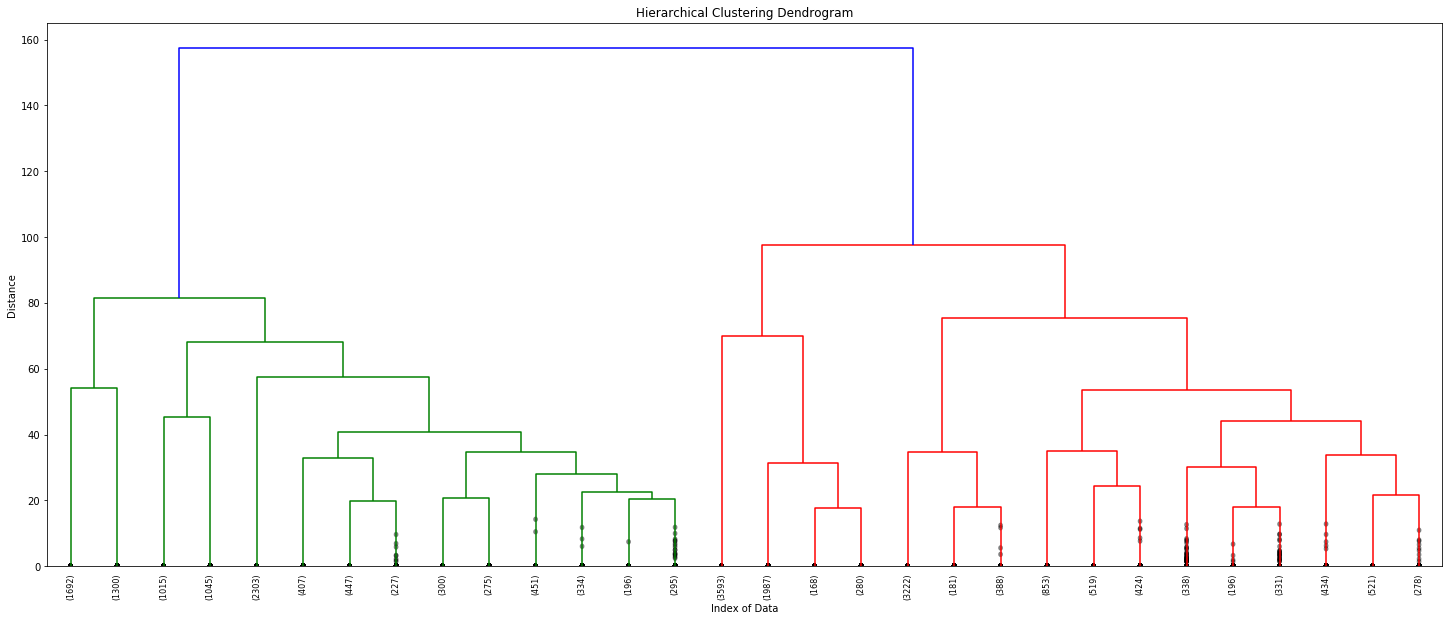

In [6]:
import sys
sys.setrecursionlimit(30000)

plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', 
                Z)

In [7]:
from scipy.cluster.hierarchy import fcluster

In [106]:
# cluster 개수 결정

import collections

big_labels = fcluster(Z, 76, criterion = 'distance');big_labels
acc_counts = collections.Counter(big_labels)
acc_counts

Counter({1: 2992, 2: 7295, 3: 6028, 4: 7685})

In [107]:
big_labels

array([3, 3, 4, ..., 3, 4, 1], dtype=int32)

In [108]:
len(list(big_labels))

24000

KMeans

In [109]:
# import packages

from sklearn.cluster import KMeans

In [110]:
# set parameter
#n_cluster = n

n_cluster = len(acc_counts)

In [111]:
# set model

kmeans_model = KMeans(n_clusters= n_cluster, max_iter=1500)

In [112]:
# fit to model

kmeans_model.fit(prep_df_d_dum)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1500,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [113]:
# predicted_labels

kmeans_model.labels_

#kmeans_model.fit_predict(preprocessed_df)

array([3, 0, 1, ..., 1, 1, 1])

In [114]:
# cluster_centers_

kmeans_model.cluster_centers_.mean()

0.16666666666666757

In [115]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43924 entries, AA00330004 to ZW01690008
Data columns (total 2 columns):
LATITUDE     43924 non-null float64
LONGITUDE    43924 non-null float64
dtypes: float64(2)
memory usage: 2.3+ MB


In [122]:
# 분석용 엑셀파일에 라벨 붙이기

input_file = "Crash_Qtr_2015_prep_df_merged(not dummied).xlsx"
df_merged = pd.read_excel(input_file)

df_merged = df_merged.set_index('REPORT_NO').sort_index()
df_merged['big_label'] = kmeans_model.labels_ + 1
df_merged_labeled = df_merged.copy()

In [123]:
# 분석용 엑셀파일에서 사고유형별 ACC_POINT 구하기

acc_type_rank_df_mean = df_merged_labeled[['big_label','INJ_FW_MEAN']].groupby('big_label').mean()


acc_type_rank_df_count = df_merged_labeled[['big_label','INJ_F_COUNT']].groupby('big_label').count()

acc_type_rank_df = acc_type_rank_df_mean.copy()
acc_type_rank_df['INJ_F_COUNT'] = acc_type_rank_df_count.INJ_F_COUNT
acc_type_rank_df['ACC_POINT'] = acc_type_rank_df.INJ_FW_MEAN * acc_type_rank_df.INJ_F_COUNT
acc_type_rank_df

,INJ_FW_MEAN,INJ_F_COUNT,ACC_POINT
big_label,,,
1,0.778857,14834,11553.561111
2,0.981644,10742,10544.816667
3,0.544705,6500,3540.583333
4,0.399294,5419,2163.776190


In [124]:
### 위치정보 붙여서 저장하기

input_file_raw = "maryland_1year_nan_contained.csv"
df_raw = pd.read_csv(input_file_raw)
df_raw = df_raw[['REPORT_NO','LATITUDE','LONGITUDE']]
df_raw = df_raw.dropna()
df_raw = df_raw.set_index('REPORT_NO').sort_index()

df_merged_labeled_loc = pd.merge(df_merged_labeled, df_raw, left_index=True, right_index=True, how='inner')

df_merged_labeled = df_merged.reset_index()

from pandas import ExcelWriter

writer = ExcelWriter

with ExcelWriter('Crash_Qtr_2015_prep_df_merged(not dummied)_labeled_withloc.xlsx') as writer:
    df_merged_labeled.to_excel(writer, sheet_name="df_merged_labeled", index=False)
    df_merged_labeled_loc.to_excel(writer, sheet_name="df_merged_labeled_with_location", index=False)
    acc_type_rank_df.to_excel(writer, sheet_name="inj_eval_grouped", index=False)


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,7,10,14,26,27,32,33,41,42,45,50,51,52,53,55,66,69,70,71,74,76,79,81,84,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


dt 돌릴 df에도 같은 작업

In [125]:
prep_df_d_dum_labeled = prep_df_d_dum.copy()
prep_df_d_dum_labeled['big_labels'] = kmeans_model.labels_+1
#prep_df_d_dummied

In [23]:
# 라벨링된 df 저장

# import pickle
import pickle

# save as DataFrame
with open('prep_df_d_dum_labeled.pkl', 'wb') as f:
    pickle.dump(prep_df_d_dum_labeled, f)
    
with open('prep_df_c_dum_labeled.pkl', 'wb') as f:
    pickle.dump(prep_df_c_dum_labeled, f)

In [25]:
# 라벨링된 df 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

with open('prep_df_d_dum_labeled.pkl', 'rb') as f:
    prep_df_d_dum_labeled = pickle.load(f)
    
with open('prep_df_c_dum_labeled.pkl', 'rb') as f:
    prep_df_c_dum_labeled = pickle.load(f)
    


In [22]:
b_label = list(prep_df_d_dum_labeled['big_labels'])
len(b_label)
prep_df_c_dum_labeled = prep_df_c_dum.copy()
prep_df_c_dum_labeled['big_label'] = b_label
prep_df_c_dum_labeled

,SURF_COND_CODE,C_M_ZONE_FLAG,SEX_CODE_M,AGE,WEATHER_CODE_Clear or Cloudy,WEATHER_CODE_Severe Winds,WEATHER_CODE_Visuality Limited,LIGHT_CODE_Dark Lights On,LIGHT_CODE_Dark No Lights,LIGHT_CODE_Daylight,...,BODY_TYPE_CODE_Van or Light Truck,CONDITION_CODE_Apparently Normal,CONDITION_CODE_Asleep or Fainted or Ill,CONDITION_CODE_Drunken or Drugged,CONDITION_CODE_Physical or Psychological Handicaps,SAF_EQUIP_CODE_Belt,SAF_EQUIP_CODE_Bike Protection,SAF_EQUIP_CODE_Child Restraints,SAF_EQUIP_CODE_None,big_label
REPORT_NO,,,,,,,,,,,,,,,,,,,,,
AA00320001,0.000000,1.414214,0.000000,0.879106,1,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,4
AA0033000B,1.414214,1.414214,1.414214,0.133777,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
AA0034000H,0.000000,0.000000,1.414214,0.152888,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,2
AA00400005,1.414214,0.000000,1.414214,0.573330,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,2
AA00400008,0.000000,0.000000,0.000000,0.286665,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,3
AA0040000L,0.000000,0.000000,1.414214,0.114666,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
AA0040000M,0.000000,0.000000,0.000000,0.229332,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
AA0040000P,0.000000,0.000000,0.000000,0.019111,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,2
AA00720005,0.000000,1.414214,0.000000,0.305776,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,3


In [9]:
# split X, y

X, y = prep_df_d_dum_labeled.drop('big_labels', axis=1),prep_df_d_dum_labeled.big_labels

Train-Test Split

In [10]:
# import packages

from sklearn.model_selection import train_test_split

In [11]:
# train_test_split with 'stratify'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=y)

Decision Tree

In [12]:
# import packages

from sklearn.tree import DecisionTreeClassifier

In [13]:
# set parameters
# max_depth: 최대 높이 지정

class_weight = 'balanced'

In [133]:
# dt_model 
# max_leaf_nodes = cluster 개수로.
dt_model = DecisionTreeClassifier(class_weight=class_weight, max_leaf_nodes=n_cluster, criterion='gini')

In [134]:
# fit to model
# default criterion: 'gini'
# 그외 옵션 볼 것.

dt_model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=4,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [135]:
# get score

dt_model.score(X=X_test, y=y_test)

0.96351610838489443

In [136]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred=dt_model.predict(X=X_test), y_true=y_test)

array([[3450,  158,    0,  101],
       [   0, 2617,    0,   68],
       [   0,    0, 1625,    0],
       [   0,    0,   15, 1340]])

Visualization via graphviz

In [137]:
# import packages for export tree

from sklearn.tree import export_graphviz

In [138]:
class_list = []

for i in range(1, n_cluster+1):
    class_list.append(str(i))

In [139]:
# export tree as .dot
# 학습이 끝난 모델을 보내줘야 함.

with open('DT_C00.dot', 'w') as f:
    export_graphviz(dt_model, f, feature_names=X.columns,
                    class_names=class_list)

In [140]:
import graphviz

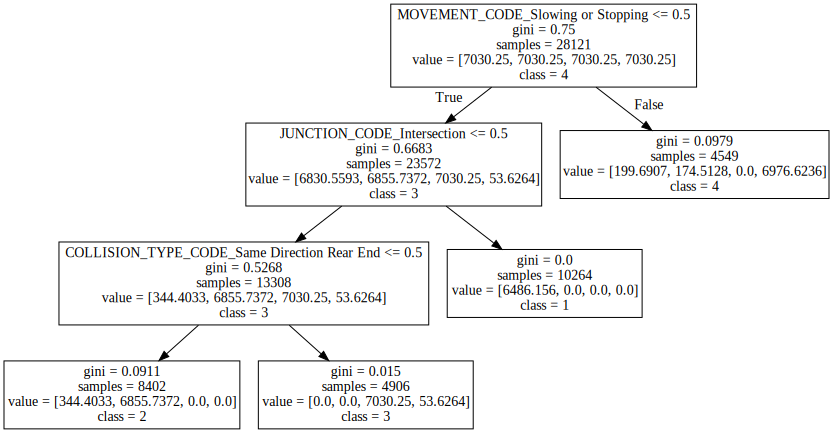

In [141]:
# open .dot & visualize

with open('DT_C00.dot', 'r') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [142]:
# 그림파일 생성
# cmd에서 해당 디렉토리로 이동한 후 명령어 입력해야 함.
# C:\Users\User\Google 드라이브\DPT 강의\데이터마이닝\메릴랜드3
# dot -Tpng DT_C00.dot -o DT_C00.png

대분류 끝

Logistic Regression을 이용한 RFE로 사고유발요인 추정

환경변수로 이루어진 데이터셋에 타겟 군집이 1의 값을 가지는 라벨을 각각 붙이기

In [62]:
# 라벨링된 df 불러오기

# import pickle
import pickle

# load as DataFrame
with open('prep_df_c_dum_labeled.pkl', 'rb') as f:
    prep_df_c_dum_labeled = pickle.load(f)

In [63]:
cl1 = prep_df_c_dum_labeled.copy()
cl2 = prep_df_c_dum_labeled.copy()
cl3 = prep_df_c_dum_labeled.copy()
cl4 = prep_df_c_dum_labeled.copy()

cls = [cl1, cl2, cl3, cl4]

In [64]:
def target_setting(row):
    if row['big_label'] == i+1:
        val = 1
    else:
        val = 0
    return val

for i in range(len(cls)):
    cls[i]['big_label'] = cls[i].apply(target_setting, axis=1)

각각의 데이터에 로지스틱 회귀모델 적용 후 RFE

In [65]:
# import packages
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import RFECV

In [66]:
def RFE_generator():
    
    for n in n_features:
    
        # estimator & selector
        selector = RFE(raw_model, n_features_to_select=n)
    
        # fit to selector
        selector.fit(X_train, y_train)
    
        # change X to selected_X_train, selected_X_test
        selected_cols = selector.support_
        selected_X_train, selected_X_test = X_train.iloc[:, selected_cols], X_test.iloc[:, selected_cols]
    
        # fitting new model
        RFE_model = selector.estimator_
        RFE_model.fit(X=selected_X_train, y=y_train)
        

        # get result
        score = RFE_model.score(X=selected_X_test, y=y_test)        
        print([n, score])

        
# parameter : n_features
n_features = []
for i in range(1, 39):
    n_features.append(i)

cl1

In [74]:
X, y = cl1.drop('big_label', axis=1), cl1.big_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

class_weight = 'balanced'

raw_model = LogisticRegression(class_weight=class_weight)
raw_model.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [68]:
RFE_generator()

[1, 0.43940687006614038]
[2, 0.43930019202048221]
[3, 0.44399402602944316]
[4, 0.44900789417537873]
[5, 0.45828888414764241]
[6, 0.45839556219330063]
[7, 0.52176232131427347]
[8, 0.56720716876466826]
[9, 0.58128867079155111]
[10, 0.58256880733944949]
[11, 0.58278216343076594]
[12, 0.58566247066353749]
[13, 0.58672925112011953]
[14, 0.58555579261787927]
[15, 0.58544911457222104]
[16, 0.59441007040751015]
[17, 0.59344996799658634]
[18, 0.59344996799658634]
[19, 0.59515681672711751]
[20, 0.59526349477277574]
[21, 0.59526349477277574]
[22, 0.59729037764028159]
[23, 0.59739705568593982]
[24, 0.59729037764028159]
[25, 0.59921058246212933]
[26, 0.5991039044164711]
[27, 0.60059739705568593]
[28, 0.59942393855344567]
[29, 0.59889054832515465]
[30, 0.5991039044164711]
[31, 0.5991039044164711]
[32, 0.59921058246212933]
[33, 0.59942393855344567]
[34, 0.59942393855344567]
[35, 0.59942393855344567]
[36, 0.59942393855344567]
[37, 0.59963729464476212]
[38, 0.59953061659910389]


In [76]:
        n = 9
        
        # estimator & selector
        selector = RFE(raw_model, n_features_to_select=n)
    
        # fit to selector
        selector.fit(X_train, y_train)
    
        # change X to selected_X_train, selected_X_test
        selected_cols = selector.support_
        selected_X_train, selected_X_test = X_train.iloc[:, selected_cols], X_test.iloc[:, selected_cols]
    
        # fitting new model
        RFE_model = selector.estimator_
        RFE_model.fit(X=selected_X_train, y=y_train)
        

        # get result
        score = RFE_model.score(X=selected_X_test, y=y_test)        
        print([n, score])

[9, 0.58054192447194364]


In [77]:
import numpy as np
selector.support_ * np.array(X_train.columns)

array(['', 'C_M_ZONE_FLAG', '', 'AGE', '', 'WEATHER_CODE_Severe Winds', '',
       '', 'LIGHT_CODE_Dark No Lights', '', '',
       'RD_COND_CODE_Defects on Surface', '', 'RD_COND_CODE_Obstruction',
       '', 'RD_DIV_CODE_One-way Trafficway',
       'RD_DIV_CODE_Two-way, Divided, Positive Median Barrier', '', '', '',
       '', '', '', '', 'BODY_TYPE_CODE_Medium or Heavy Truck', '', '', '',
       '', '', '', '', '', '', '', '', '', ''], dtype=object)

cl2

In [78]:
X, y = cl2.drop('big_label', axis=1), cl2.big_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

class_weight = 'balanced'

raw_model = LogisticRegression(class_weight=class_weight)
raw_model.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [71]:
RFE_generator()

[1, 0.72338382760827824]
[2, 0.72167697887774696]
[3, 0.7214636227864305]
[4, 0.71154256454021758]
[5, 0.71154256454021758]
[6, 0.71154256454021758]
[7, 0.69372733091529759]
[8, 0.6432686153189674]
[9, 0.6432686153189674]
[10, 0.6432686153189674]
[11, 0.6432686153189674]
[12, 0.65212289310859828]
[13, 0.64902922978451039]
[14, 0.64806912737358646]
[15, 0.64412203968423298]
[16, 0.66300405376573501]
[17, 0.66300405376573501]
[18, 0.65350970770215489]
[19, 0.65735011734585025]
[20, 0.65756347343716659]
[21, 0.65799018561979949]
[22, 0.65809686366545761]
[23, 0.65809686366545761]
[24, 0.65809686366545761]
[25, 0.65809686366545761]
[26, 0.65799018561979949]
[27, 0.65799018561979949]
[28, 0.65799018561979949]
[29, 0.65841689780243229]
[30, 0.65841689780243229]
[31, 0.65841689780243229]
[32, 0.65863025389374863]
[33, 0.65905696607638153]
[34, 0.65905696607638153]
[35, 0.65905696607638153]
[36, 0.65884360998506508]
[37, 0.65884360998506508]
[38, 0.65884360998506508]


In [79]:
        n = 6
        
        # estimator & selector
        selector = RFE(raw_model, n_features_to_select=n)
    
        # fit to selector
        selector.fit(X_train, y_train)
    
        # change X to selected_X_train, selected_X_test
        selected_cols = selector.support_
        selected_X_train, selected_X_test = X_train.iloc[:, selected_cols], X_test.iloc[:, selected_cols]
    
        # fitting new model
        RFE_model = selector.estimator_
        RFE_model.fit(X=selected_X_train, y=y_train)
        

        # get result
        score = RFE_model.score(X=selected_X_test, y=y_test)        
        print([n, score])

[6, 0.70439513548111798]


In [80]:
selector.support_ * np.array(X_train.columns)

array(['', '', '', '', '', '', '', '', 'LIGHT_CODE_Dark No Lights', '', '',
       'RD_COND_CODE_Defects on Surface', '', 'RD_COND_CODE_Obstruction',
       '', '', '', '', '', '', '', '', '', '',
       'BODY_TYPE_CODE_Medium or Heavy Truck', '', '', '', '', '',
       'CONDITION_CODE_Apparently Normal', '', '', '',
       'SAF_EQUIP_CODE_Belt', '', '', ''], dtype=object)

cl3

In [81]:
X, y = cl3.drop('big_label', axis=1), cl3.big_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

class_weight = 'balanced'

raw_model = LogisticRegression(class_weight=class_weight)
raw_model.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [82]:
RFE_generator()

[1, 0.17367185833155538]
[2, 0.18615318967356517]
[3, 0.50842756560699809]
[4, 0.5803285683806273]
[5, 0.58235545124813315]
[6, 0.58246212929379138]
[7, 0.58683592916577765]
[8, 0.58246212929379138]
[9, 0.65212289310859828]
[10, 0.61926605504587151]
[11, 0.62001280136547898]
[12, 0.62001280136547898]
[13, 0.61777256240665668]
[14, 0.61051845530189885]
[15, 0.61019842116492429]
[16, 0.61062513334755708]
[17, 0.61073181139321531]
[18, 0.6089182846170258]
[19, 0.60881160657136757]
[20, 0.60881160657136757]
[21, 0.60209088969490077]
[22, 0.60209088969490077]
[23, 0.60198421164924254]
[24, 0.60155749946660975]
[25, 0.60166417751226797]
[26, 0.60155749946660975]
[27, 0.60475784083635586]
[28, 0.60475784083635586]
[29, 0.60486451888201409]
[30, 0.60465116279069764]
[31, 0.60475784083635586]
[32, 0.60465116279069764]
[33, 0.60454448474503952]
[34, 0.60433112865372307]
[35, 0.60433112865372307]
[36, 0.60433112865372307]
[37, 0.60433112865372307]
[38, 0.60433112865372307]


In [83]:
        n = 9
        
        # estimator & selector
        selector = RFE(raw_model, n_features_to_select=n)
    
        # fit to selector
        selector.fit(X_train, y_train)
    
        # change X to selected_X_train, selected_X_test
        selected_cols = selector.support_
        selected_X_train, selected_X_test = X_train.iloc[:, selected_cols], X_test.iloc[:, selected_cols]
    
        # fitting new model
        RFE_model = selector.estimator_
        RFE_model.fit(X=selected_X_train, y=y_train)
        

        # get result
        score = RFE_model.score(X=selected_X_test, y=y_test)        
        print([n, score])

[9, 0.65212289310859828]


In [84]:
selector.support_ * np.array(X_train.columns)

array(['SURF_COND_CODE', 'C_M_ZONE_FLAG', '', '', '', '', '', '', '', '',
       '', '', 'RD_COND_CODE_No Defects', '', '', '', '',
       'RD_DIV_CODE_Two-way, Divided, Unprotected (painted >4 feet) Median',
       'RD_DIV_CODE_Two-way, Not Divided', '', '', '',
       'BODY_TYPE_CODE_Bus', '', '', '', 'BODY_TYPE_CODE_Offraod Vehicle',
       '', 'BODY_TYPE_CODE_Public Vehicle/NE', '', '', '', '', '', '', '',
       'SAF_EQUIP_CODE_Child Restraints', ''], dtype=object)

cl4

In [85]:
X, y = cl4.drop('big_label', axis=1), cl4.big_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

class_weight = 'balanced'

raw_model = LogisticRegression(class_weight=class_weight)
raw_model.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [86]:
RFE_generator()

[1, 0.15521655643268614]
[2, 0.1686579901856198]
[3, 0.16908470236825263]
[4, 0.16908470236825263]
[5, 0.22658416897802433]
[6, 0.63580115212289312]
[7, 0.64988265414977597]
[8, 0.65009601024109243]
[9, 0.64646895668871351]
[10, 0.64646895668871351]
[11, 0.64625560059739706]
[12, 0.64657563473437163]
[13, 0.64390868359291653]
[14, 0.64390868359291653]
[15, 0.64390868359291653]
[16, 0.65308299551952209]
[17, 0.65052272242372522]
[18, 0.65041604437806699]
[19, 0.63345423511841259]
[20, 0.59398335822487736]
[21, 0.59462342649882649]
[22, 0.59441007040751015]
[23, 0.59430339236185192]
[24, 0.59473010454448472]
[25, 0.59515681672711751]
[26, 0.5937700021335609]
[27, 0.5937700021335609]
[28, 0.59537017281843396]
[29, 0.59398335822487736]
[30, 0.59398335822487736]
[31, 0.59398335822487736]
[32, 0.59409003627053547]
[33, 0.59409003627053547]
[34, 0.59409003627053547]
[35, 0.59483678259014294]
[36, 0.59483678259014294]
[37, 0.59547685086409219]
[38, 0.59547685086409219]


In [87]:
        n = 8
        
        # estimator & selector
        selector = RFE(raw_model, n_features_to_select=n)
    
        # fit to selector
        selector.fit(X_train, y_train)
    
        # change X to selected_X_train, selected_X_test
        selected_cols = selector.support_
        selected_X_train, selected_X_test = X_train.iloc[:, selected_cols], X_test.iloc[:, selected_cols]
    
        # fitting new model
        RFE_model = selector.estimator_
        RFE_model.fit(X=selected_X_train, y=y_train)
        

        # get result
        score = RFE_model.score(X=selected_X_test, y=y_test)        
        print([n, score])

[8, 0.65009601024109243]


In [88]:
selector.support_ * np.array(X_train.columns)

array(['', '', '', '', '', '', '', '', 'LIGHT_CODE_Dark No Lights', '', '',
       '', '', 'RD_COND_CODE_Obstruction', '', '',
       'RD_DIV_CODE_Two-way, Divided, Positive Median Barrier', '', '', '',
       '', '', '', '', '', '', 'BODY_TYPE_CODE_Offraod Vehicle', '', '',
       '', 'CONDITION_CODE_Apparently Normal',
       'CONDITION_CODE_Asleep or Fainted or Ill', '', '', '', '',
       'SAF_EQUIP_CODE_Child Restraints', 'SAF_EQUIP_CODE_None'], dtype=object)